In [1]:
# 2024-12-01 тест скриптов

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px

In [3]:
df = pd.read_excel('base1.xlsx', sheet_name='base')

In [4]:
df.rename(columns={'Дата': 'DATA', 'Счет Дт': 'SD', 'Субконто1 Дт': 'SKD1', 'Субконто2 Дт': 'SKD2', 'Субконто3 Дт': 'SKD3', 'Счет Кт': 'SK', 
        'Субконто1 Кт': 'SKK1', 'Субконто2 Кт': 'SKK2', 'Субконто3 Кт': 'SKK3', 'Сумма': 'SUMMA'}, inplace=True)

df = df[(df['SK']=='90.01.1') | (df['SD']=='90.02.1')]

df['ST'] = (df['SUMMA']/1000).round(2)
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True)
df['Год']=pd.DatetimeIndex(df['DATA']).year.astype('object')
df['Месяц'] = pd.DatetimeIndex(df['DATA']).month.astype('object')
df['День'] = pd.DatetimeIndex(df['DATA']).day.astype('object')
df['Квартал'] = pd.DatetimeIndex(df['DATA']).quarter.astype('object')
df['YM'] = df['DATA'].dt.to_period('M')

df = df[df['Год']>=2021]

df['Статья'] = ''
df.loc[df['SK']=='90.01.1', 'Статья'] = 'Продажи'
df.loc[df['SD']=='90.02.1', 'Статья'] = 'Себестоимость'

df['Номенклатура'] = ''
df.loc[df['SK']=='90.01.1', 'Номенклатура'] = df['SKK3']
df.loc[((df['SD']=='90.02.1') & (df['SK']=='41.01')), 'Номенклатура'] = df['SKK1']
df.loc[((df['SD']=='90.02.1') & (df['SK']=='45.01')), 'Номенклатура'] = df['SKK2']

df['ДС'] = 0
df.loc[df['SK']=='90.01.1', 'ДС'] = df['ST'] /1.2
df.loc[df['SD']=='90.02.1', 'ДС'] = df['ST']*-1

df['Продажи'] = 0
df.loc[df['SK']=='90.01.1', 'Продажи'] = df['ST'] /1.2

df['Себестоимость'] = 0
df.loc[df['SD']=='90.02.1', 'Себестоимость'] = df['ST']*-1

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11469 entries, 312 to 25679
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   N                  11469 non-null  int64         
 1   DATA               11469 non-null  datetime64[ns]
 2   Уточнение периода  0 non-null      float64       
 3   Документ           0 non-null      float64       
 4   SD                 11469 non-null  object        
 5   Кол.               0 non-null      object        
 6   Количество Дт      0 non-null      float64       
 7   Валюта Дт          0 non-null      object        
 8   Вал. сумма Дт      0 non-null      float64       
 9   Подразделение Дт   0 non-null      float64       
 10  SKD1               11335 non-null  object        
 11  SKD2               5512 non-null   object        
 12  SKD3               5509 non-null   object        
 13  SK                 11469 non-null  object        
 14  Кол..1   

C:\Users\smole\AppData\Local\Temp\ipykernel_27800\3866304133.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 17.41666667  11.58333333  13.325      ... -32.25       -19.83333333
  49.625     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SK']=='90.01.1', 'ДС'] = df['ST'] /1.2
C:\Users\smole\AppData\Local\Temp\ipykernel_27800\3866304133.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 17.41666667  11.58333333  13.325      ... -32.25       -19.83333333
  49.625     ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SK']=='90.01.1', 'Продажи'] = df['ST'] /1.2
C:\Users\smole\AppData\Local\Temp\ipykernel_27800\3866304133.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise a

In [5]:
df['SKK3'].unique()

array([nan, 'Телефон модель 920', 'Телефон модель 289',
       'Телефон модель 820', 'Телефон модель 610', 'Телефон модель 220',
       'Телефон модель 615', 'Телефон модель 715', 'Телефон модель 1',
       'Телефон модель 320', 'товар прочий', 'Телефон модель А199',
       'Телефон модель 420', 'Телефон модель 425', 'Телефон модель 389',
       'Телефон модель 720', 'Телефон модель 390', 'Гаджет 820',
       'Гаджет 420', 'Гаджет 920', 'Телефон модель 925',
       'Телефон модель А 925', 'Телефон модель 490', 'Гаджет 425',
       'Прочие', 'Маркетинговые услуги.', 'Гаджет 289',
       'Поступление (акт, накладная, УПД) 0000-000786 от 30.11.2022 0:00:00',
       'Гаджет 199'], dtype=object)

In [6]:
df_1 = df[df['SKK3']=='Телефон модель 420']

df_1.head(5)

,N,DATA,Уточнение периода,Документ,SD,Кол.,Количество Дт,Валюта Дт,Вал. сумма Дт,Подразделение Дт,...,Год,Месяц,День,Квартал,YM,Статья,Номенклатура,ДС,Продажи,Себестоимость
3333,4,2021-05-06 12:00:00,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2021,5,6,2,2021-05,Продажи,Телефон модель 420,2270.833333,2270.833333,0.0
3729,4,2021-05-25 00:00:00,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2021,5,25,2,2021-05,Продажи,Телефон модель 420,6708.408333,6708.408333,0.0
6974,12,2021-10-22 00:00:00,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2021,10,22,4,2021-10,Продажи,Телефон модель 420,908.333333,908.333333,0.0
7066,2,2021-10-26 12:00:01,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2021,10,26,4,2021-10,Продажи,Телефон модель 420,1362.500000,1362.500000,0.0
7279,31,2021-10-31 20:00:00,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2021,10,31,4,2021-10,Продажи,Телефон модель 420,52.816667,52.816667,0.0


In [11]:
# df_1.columns

type(df_1.columns)

pandas.core.indexes.base.Index

In [14]:
# df_1['Продажи']

type(df_1['Продажи'])

pandas.core.series.Series

In [15]:
pt_1 = pd.pivot_table(df_1, index='YM', values='Продажи')

pt_1

,Продажи
YM,
2021-05,4489.620833
2021-10,588.729167
2021-11,351.574359
2021-12,126.861782
2022-01,54.808780
2022-02,44.852244
2022-03,41.073387
2022-04,53.952576
2022-05,38.957333


<Axes: xlabel='YM'>

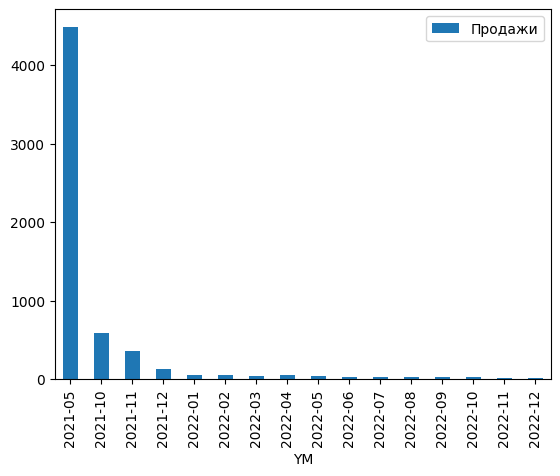

In [18]:
pt_1.plot(kind='bar')

In [63]:
# по годам
pt00 = pd.pivot_table(df, index=['Статья'], values=['ДС'], columns=['Год'], aggfunc='sum', fill_value='', margins=False).round(2)
pt00 = pt00['ДС']
pt00 = pt00.transpose()
pt00['Марж.прибыль'] = pt00['Продажи'] + pt00['Себестоимость']
pt00['Маржа_пр'] = (pt00['Марж.прибыль']/pt00['Продажи']*100).round(1)
pt00['Маржа_%'] = ((pt00['Марж.прибыль'] / pt00['Продажи'])*100).round(1)
# вот так исправляю формат числа:
# pt00 = pt00.style.format(precision=1, thousands=" ", decimal=",")


In [64]:
pt00

Статья,Продажи,Себестоимость,Марж.прибыль,Маржа_пр,Маржа_%
Год,,,,,
2021,180581.85,-129351.87,51229.98,28.4,28.4
2022,138935.67,-82114.50,56821.17,40.9,40.9


In [55]:
pt001 = pt00[['Продажи', 'Марж.прибыль']]

pt001

Статья,Продажи,Марж.прибыль
Год,,
2021,180581.85,51229.98
2022,138935.67,56821.17


In [62]:
pt001.rename({"Продажи": "1_Продажи", "Марж.прибыль": "2_Марж.прибыль"}, axis='columns')

Статья,1_Продажи,2_Марж.прибыль
Год,,
2021,180581.85,51229.98
2022,138935.67,56821.17


In [12]:
pt00.index


Index([2021, 2022], dtype='int64', name='Год')

In [14]:
pt00.loc[ :, : ]

Статья,Продажи,Себестоимость,Марж.прибыль,Маржа_пр
Год,,,,
2021,180581.85,-129351.87,51229.98,28.4
2022,138935.67,-82114.50,56821.17,40.9


In [53]:
a1 = pt00.iloc[0, 2]
a1

np.float64(51229.98000000001)

In [54]:
a2 = pt00.iloc[1, 2]
a2

np.float64(56821.17000000001)

In [52]:
da = a2 - a1
da

np.float64(-41646.17999999999)

In [24]:
pt00.iloc[:1 , :1 ]

Статья,Продажи
Год,
2021,180581.85


In [29]:
a2 = pt00.iloc[1:2 , :1]

a2

Статья,Продажи
Год,
2022,138935.67


In [30]:
type(a2)

pandas.core.frame.DataFrame

In [28]:
d =  (pt00.iloc[1:2 , :1 ]) - (pt00.iloc[:1 , :1 ])
d

Статья,Продажи
Год,
2021,NaN
2022,NaN


<Axes: xlabel='Год'>

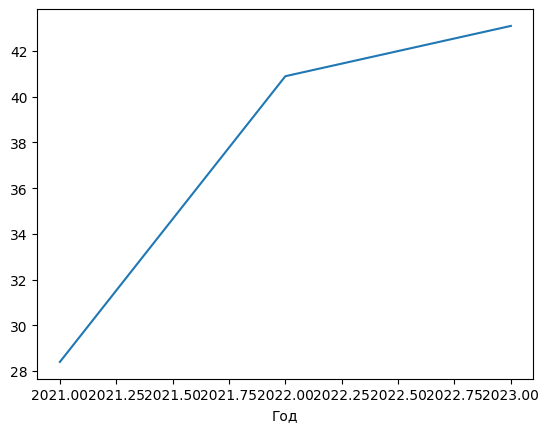

In [7]:
pt00.loc[:, "Маржа_пр"].plot()

In [8]:
pt01 = pt00.style.format(precision=1, thousands=" ", decimal=",")

In [9]:
pt01

Статья,Продажи,Себестоимость,Марж.прибыль,Маржа_пр
Год,,,,
2021,"180 581,9","-129 351,9","51 230,0","28,4"
2022,"138 935,7","-82 114,5","56 821,2","40,9"
2023,"91 520,9","-52 118,2","39 402,7","43,1"


In [10]:
pt1 = pd.pivot_table(df, index=['Статья'], values=['ДС'], columns=['Год', 'Месяц'], aggfunc='sum', fill_value='', margins=False).round(2)
pt1 = pt1['ДС']
pt1 = pt1.transpose()
pt1['Марж.прибыль'] = pt1['Продажи'] + pt1['Себестоимость']
pt1['Маржа_%'] = (pt1['Марж.прибыль']/pt1['Продажи'])*100

pt1

Статья       Продажи  Себестоимость  Марж.прибыль    Маржа_%
Год  Месяц                                                  
2021 1       4359.73       -3099.21       1260.52  28.912800
     2       4715.93       -2929.78       1786.15  37.874820
     3      18806.48      -13598.91       5207.57  27.690296
     4      15606.04      -11753.98       3852.06  24.683136
     5      22704.43      -16295.36       6409.07  28.228280
     6       4466.78       -3399.83       1066.95  23.886334
     7       7522.26       -5744.54       1777.72  23.632791
     8      15538.91      -11259.57       4279.34  27.539512
     9       9982.02       -7080.45       2901.57  29.067964
     10     21107.48      -16136.20       4971.28  23.552219
     11     17526.23      -12713.84       4812.39  27.458215
     12     38245.56      -25340.20      12905.36  33.743420
2022 1       6898.70       -4643.99       2254.71  32.683114
     2       9193.99       -6561.85       2632.14  28.628920
     3      12686.58       -8421.97       4264.61  33.615127
     4      20121.88      -11556.45       8565.43  42.567742
     5      14946.99       -7813.73       7133.26  47.723722
     6       8179.76       -4396.19       3783.57  46.255269
     7       9625.70       -5635.81       3989.89  41.450388
     8       7064.48       -3757.42       3307.06  46.812504
     9       8555.83       -4627.66       3928.17  45.912203
     10     19661.79      -13547.31       6114.48  31.098288
     11      9898.93       -4716.68       5182.25  52.351618
     12     12101.04       -6435.44       5665.60  46.819116
2023 1      15245.58       -7908.52       7337.06  48.125817
     2      18717.43      -10170.83       8546.60  45.661183
     3      23490.02      -16173.10       7316.92  31.149058
     4      30586.43      -16435.06      14151.37  46.266825
     5       3481.48       -1430.71       2050.77  58.905121

In [11]:
tabl = pt1.loc[:, "Марж.прибыль"]

tabl

Год   Месяц
2021  1         1260.52
      2         1786.15
      3         5207.57
      4         3852.06
      5         6409.07
      6         1066.95
      7         1777.72
      8         4279.34
      9         2901.57
      10        4971.28
      11        4812.39
      12       12905.36
2022  1         2254.71
      2         2632.14
      3         4264.61
      4         8565.43
      5         7133.26
      6         3783.57
      7         3989.89
      8         3307.06
      9         3928.17
      10        6114.48
      11        5182.25
      12        5665.60
2023  1         7337.06
      2         8546.60
      3         7316.92
      4        14151.37
      5         2050.77
Name: Марж.прибыль, dtype: float64

In [12]:
tabl.info()

<class 'pandas.core.series.Series'>
MultiIndex: 29 entries, (np.int64(2021), np.int64(1)) to (np.int64(2023), np.int64(5))
Series name: Марж.прибыль
Non-Null Count  Dtype  
--------------  -----  
29 non-null     float64
dtypes: float64(1)
memory usage: 542.0 bytes


<Axes: xlabel='Год,Месяц'>

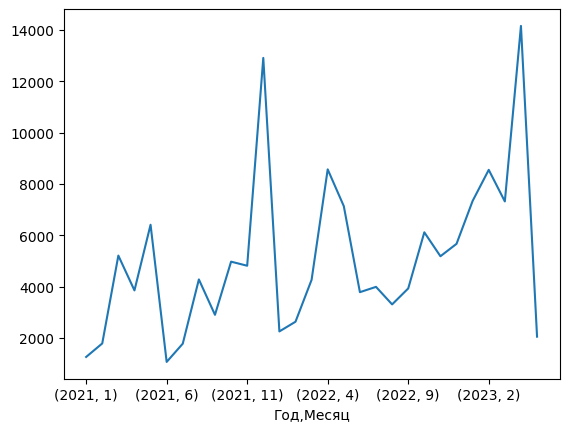

In [13]:
tabl.plot(kind="line")

In [14]:

df.tail()

,N,DATA,Уточнение периода,Документ,SD,Кол.,Количество Дт,Валюта Дт,Вал. сумма Дт,Подразделение Дт,...,Год,Месяц,День,Квартал,YM,Статья,Номенклатура,ДС,Продажи,Себестоимость
41887,14,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 390,19.491667,19.491667,0.0
41888,15,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 420,10.241667,10.241667,0.0
41889,16,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 420,10.233333,10.233333,0.0
41890,17,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 920,15.675000,15.675000,0.0
41891,18,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Гаджет 199,0.716667,0.716667,0.0


In [15]:

df90 = df[df['SK']=='90.01.1']

df90.tail()

,N,DATA,Уточнение периода,Документ,SD,Кол.,Количество Дт,Валюта Дт,Вал. сумма Дт,Подразделение Дт,...,Год,Месяц,День,Квартал,YM,Статья,Номенклатура,ДС,Продажи,Себестоимость
41887,14,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 390,19.491667,19.491667,0.0
41888,15,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 420,10.241667,10.241667,0.0
41889,16,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 420,10.233333,10.233333,0.0
41890,17,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Телефон модель 920,15.675000,15.675000,0.0
41891,18,2023-05-22 09:42:46,NaN,NaN,62.01,NaN,NaN,NaN,NaN,NaN,...,2023,5,22,2,2023-05,Продажи,Гаджет 199,0.716667,0.716667,0.0


In [16]:
pt90_1 = pd.pivot_table(df90, index=['YM'], values=['ДС'], aggfunc='sum', fill_value=0, margins=False)/1000

pt90_1.reset_index(inplace=True)

pt90_1['YM'] = pt90_1['YM'].astype('str')
pt90_1

,YM,ДС
0,2021-01,4.359725
1,2021-02,4.715933
2,2021-03,18.806483
3,2021-04,15.606042
4,2021-05,22.704433
5,2021-06,4.466783
6,2021-07,7.522258
7,2021-08,15.538908
8,2021-09,9.982017
9,2021-10,21.107475


<Axes: >

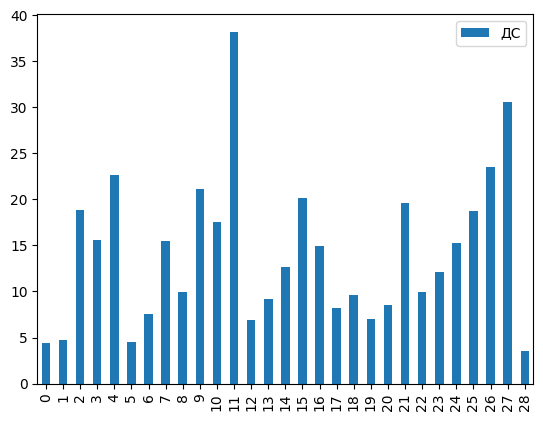

In [17]:
pt90_1.plot(kind='bar')

In [18]:
pt90_pn = pd.pivot_table(df90, index=['Год', 'SKD1', 'SKK3'], values=['ДС'], aggfunc='sum', fill_value=0, margins=False)
# pt90_pn = pt90_pn['ДС']

pt90_pn.reset_index(inplace=True)

pt90_pn

,Год,SKD1,SKK3,ДС
0,2021,ТД Губари,товар прочий,625.000000
1,2021,ТД Завидово,Телефон модель 1,133.633333
2,2021,ТД Завидово,Телефон модель 220,1189.000000
3,2021,ТД Завидово,Телефон модель 289,683.416667
4,2021,ТД Завидово,Телефон модель 320,173.333333
...,...,...,...,...
357,2023,основной,Телефон модель 390,23.166667
358,2023,основной,Телефон модель 615,13.250000
359,2023,основной,Телефон модель 720,11.583333
360,2023,основной,Телефон модель 925,24.916667


In [ ]:
# fig = px.treemap(pt90_pn, path=[px.Constant('SKK3'), 'SKD1'], values='ДС', hover_data=['SKK3'])
fig = px.treemap(pt90_pn, path=[px.Constant('all'), 'Год', 'SKD1', 'SKK3'], values='ДС', color='SKD1') #  ,hover_data=['SKK3']
# fig = px.treemap(pt90_pn.query('Год==2022'), path=[px.Constant('all'), 'Год', 'SKD1', 'SKK3'], values='ДС', color='SKD1') #  ,hover_data=['SKK3']

fig = px.treemap(pt90_pn, path=[px.Constant('all'), 'Год', 'SKD1', 'SKK3'], values='ДС', color='SKD1')

fig.show()